1) Loss Function: Guides the training process by quantifying the difference between actual and predicted values. Example: Mean Squared Error (MSE).

2) Metrics: Evaluate the model's performance and guide tuning. Examples: Mean Absolute Error (MAE) and R-squared (R²).


By minimizing the loss function and optimizing the metrics, you can improve the accuracy and performance of your machine learning or deep learning model.

Creating a custom loss function involves understanding the key components and mechanisms that make a loss function work effectively. Here are the essential parts of a loss function and a guide on how to create one:

Key Components of a Loss Function

Inputs:

1. Predictions (outputs): The outputs generated by your model during the forward pass.
2. Targets (labels): The true values that your model aims to predict.

Computation:

The core logic that computes the error or difference between the predictions and the targets. This can be a simple difference, squared difference, or any other mathematical formulation that quantifies the error.


Output:

A scalar value representing the loss, which will be used to guide the optimization process.

## Creating Custom Loss functions

Role of forward in PyTorch

In PyTorch, any class that inherits from torch.nn.Module must implement a forward method.

This method defines the computation that the module will perform on input data.

For standard neural network modules, this typically involves passing data through layers and applying activations.

For a custom loss function, the forward method defines how the loss is computed from the model's predictions and the actual targets.

In [1]:
import torch
import torch.nn as nn

class CustomLoss(nn.Module):
    def __init__(self):
      super(CustomLoss, self).__init__()
      self.mse = nn.MSELoss()
      self.mae = nn.L1Loss()

    def forward(self, outputs, targets):
      mse_loss = self.mse(outputs, targets)
      mae_loss = self.mae(outputs,targets)
      return mse_loss + mae_loss

In [2]:
import torch.optim as optim

# Generate some dummy data
torch.manual_seed(0)
X = torch.randn(100, 1)
y = 3 * X + 1 + torch.randn(100, 1) * 0.1

# Define a simple linear model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [3]:
model = LinearRegressionModel()

# Use the custom loss function
criterion = CustomLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Zero the gradient buffers
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimize
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch}], Loss: {loss.item():.4f}')


Epoch [0], Loss: 7.1251
Epoch [1], Loss: 6.8221
Epoch [2], Loss: 6.5317
Epoch [3], Loss: 6.2535
Epoch [4], Loss: 5.9869
Epoch [5], Loss: 5.7315
Epoch [6], Loss: 5.4867
Epoch [7], Loss: 5.2522
Epoch [8], Loss: 5.0274
Epoch [9], Loss: 4.8120
Epoch [10], Loss: 4.6057
Epoch [11], Loss: 4.4079
Epoch [12], Loss: 4.2184
Epoch [13], Loss: 4.0368
Epoch [14], Loss: 3.8628
Epoch [15], Loss: 3.6961
Epoch [16], Loss: 3.5363
Epoch [17], Loss: 3.3832
Epoch [18], Loss: 3.2365
Epoch [19], Loss: 3.0959
Epoch [20], Loss: 2.9612
Epoch [21], Loss: 2.8321
Epoch [22], Loss: 2.7084
Epoch [23], Loss: 2.5900
Epoch [24], Loss: 2.4766
Epoch [25], Loss: 2.3679
Epoch [26], Loss: 2.2638
Epoch [27], Loss: 2.1641
Epoch [28], Loss: 2.0685
Epoch [29], Loss: 1.9768
Epoch [30], Loss: 1.8890
Epoch [31], Loss: 1.8049
Epoch [32], Loss: 1.7243
Epoch [33], Loss: 1.6471
Epoch [34], Loss: 1.5732
Epoch [35], Loss: 1.5024
Epoch [36], Loss: 1.4345
Epoch [37], Loss: 1.3694
Epoch [38], Loss: 1.3071
Epoch [39], Loss: 1.2473
Epoch [40]

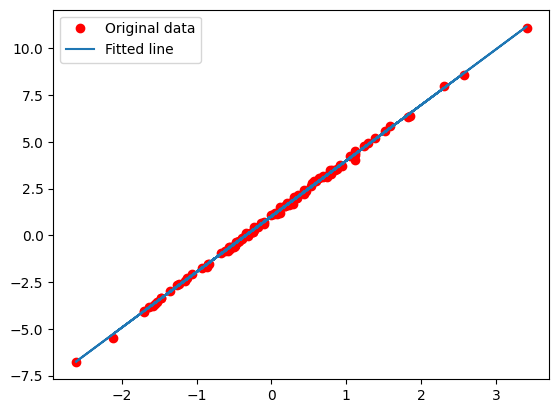

In [7]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(X).detach().numpy()

# Plot the results
import matplotlib.pyplot as plt

plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
plt.plot(X.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()

## In Tensorflow and Keras

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

# Define the custom loss function
class CustomLoss(tf.keras.losses.Loss):
    def __init__(self, name='custom_loss'):
        super(CustomLoss, self).__init__(name=name)
        self.mse = MeanSquaredError()
        self.mae = MeanAbsoluteError()

    def call(self, y_true, y_pred):
        mse_loss = self.mse(y_true, y_pred)
        mae_loss = self.mae(y_true, y_pred)
        return mse_loss + mae_loss


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


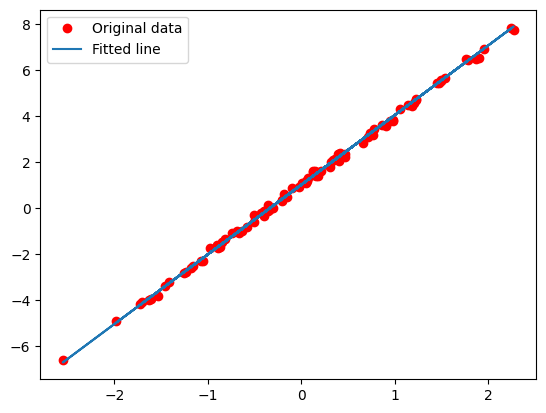

In [9]:
# Generate some dummy data
np.random.seed(0)
X = np.random.randn(100, 1).astype(np.float32)
y = 3 * X + 1 + np.random.randn(100, 1) * 0.1

# Define a simple linear model
model = Sequential([
    Dense(1, input_shape=(1,))
])

# Compile the model with the custom loss function
model.compile(optimizer=SGD(learning_rate=0.01), loss=CustomLoss())

# Training the model
num_epochs = 100
history = model.fit(X, y, epochs=num_epochs, verbose=0)

# Evaluate the model
predicted = model.predict(X)

# Plot the results
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

## For Neural Network

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the network
model = SimpleNN()

# Define an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [11]:
class CustomLoss(nn.Module):
    def __init__(self, penalty=1.0):
        super(CustomLoss, self).__init__()
        self.penalty = penalty

    def forward(self, predictions, targets):
        mse_loss = torch.mean((predictions - targets) ** 2)
        penalty_loss = torch.mean((predictions ** 2) * self.penalty)  # Penalize small predictions
        return mse_loss + penalty_loss

# Create an instance of the custom loss function
criterion = CustomLoss(penalty=0.1)

In [37]:
# Define custom metric
class CustomMAEMetric:
    def __init__(self, penalty=1.0):
        self.penalty = penalty

    def __call__(self, predictions, targets):
        mae = torch.mean(torch.abs(predictions - targets))
        penalty = torch.mean(torch.abs(predictions) * self.penalty)
        return mae + penalty

In [38]:
metric = CustomMAEMetric(penalty=0.1)


In [40]:
# Generate synthetic data
np.random.seed(0)
torch.manual_seed(0)

X = np.linspace(-10, 10, 100).reshape(-1, 1).astype(np.float32)
y = (3 * X + 2 + np.random.normal(0, 1, X.shape)).astype(np.float32)

In [13]:
X_train = torch.tensor(X)
y_train = torch.tensor(y)

In [ ]:
# Convert predictions list to numpy array for plotting
predictions_array = np.array(predictions_list)  # Shape: (100, 100, 1)

# Extract the final epoch's predictions
final_predictions = predictions_array[-1].flatten()  # Shape: (100,)

# Plot the loss curve and predictions
plt.figure(figsize=(12, 6))

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot true values vs predictions
plt.subplot(1, 2, 2)
plt.scatter(X_train.numpy(), y_train.numpy(), label='True Values', color='blue', alpha=0.5)
plt.scatter(X_train.numpy(), final_predictions, label='Predictions', color='red', alpha=0.5)
plt.xlabel('Input Feature')
plt.ylabel('Target Value / Prediction')
plt.title('True Values vs Predictions')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
import matplotlib.pyplot as plt

# Training loop
num_epochs = 100
losses = []
metrics = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    metrics.append(metric(outputs, y_train).item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Metric: {metrics[-1]:.4f}')

Epoch [10/100], Loss: 28.8284, Metric: 2.9633
Epoch [20/100], Loss: 28.8390, Metric: 3.0092
Epoch [30/100], Loss: 28.8259, Metric: 2.9806
Epoch [40/100], Loss: 28.8196, Metric: 2.9452
Epoch [50/100], Loss: 28.8193, Metric: 2.9317
Epoch [60/100], Loss: 28.8179, Metric: 2.9367
Epoch [70/100], Loss: 28.8166, Metric: 2.9442
Epoch [80/100], Loss: 28.8156, Metric: 2.9459
Epoch [90/100], Loss: 28.8147, Metric: 2.9439
Epoch [100/100], Loss: 28.8138, Metric: 2.9415


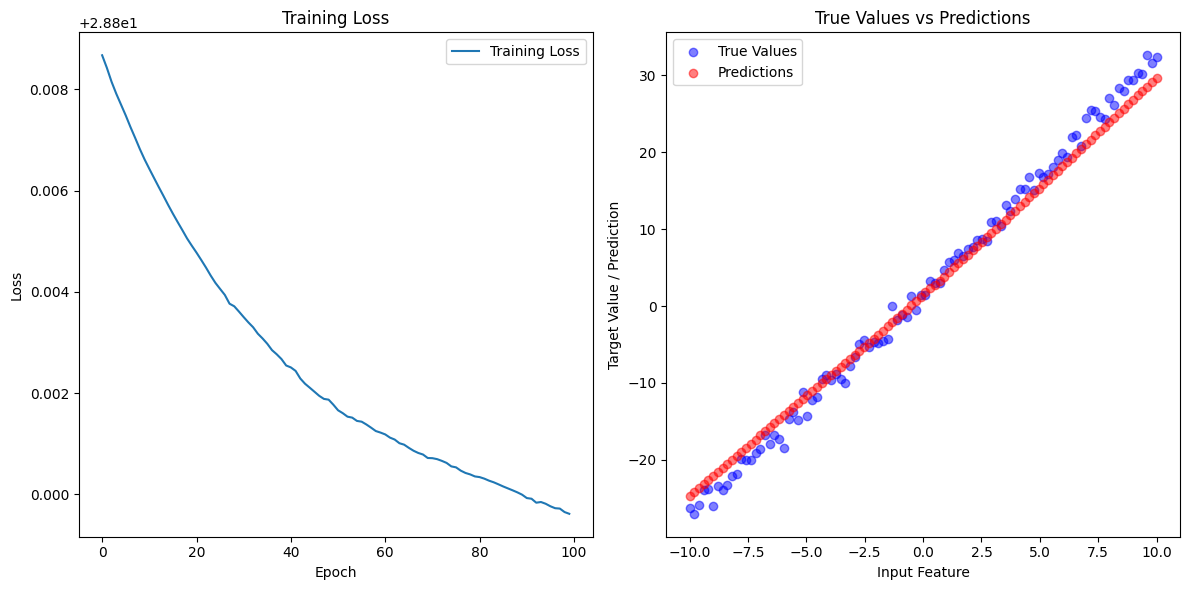

In [31]:
# Plot the loss curve and predictions
plt.figure(figsize=(12, 6))

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot true values vs predictions
plt.subplot(1, 2, 2)
plt.scatter(X_train.numpy(), y_train.numpy(), label='True Values', color='blue', alpha=0.5)
plt.scatter(X_train.numpy(), final_predictions, label='Predictions', color='red', alpha=0.5)
plt.xlabel('Input Feature')
plt.ylabel('Target Value / Prediction')
plt.title('True Values vs Predictions')
plt.legend()

plt.tight_layout()
plt.show()

## Tensorflow and Keras

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Define custom loss function
def custom_mse_loss(y_true, y_pred):
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    penalty_loss = tf.reduce_mean(tf.square(y_pred) * 0.1)  # Penalize small predictions
    return mse_loss + penalty_loss

In [35]:
# Generate synthetic data
np.random.seed(0)
tf.random.set_seed(0)

X = np.linspace(-10, 10, 100).reshape(-1, 1).astype(np.float32)
y = (3 * X + 2 + np.random.normal(0, 1, X.shape)).astype(np.float32)

# Compile the model
model.compile(optimizer='adam', loss=custom_mse_loss)

# Train the model
history = model.fit(X, y, epochs=100, verbose=0, validation_split=0.1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


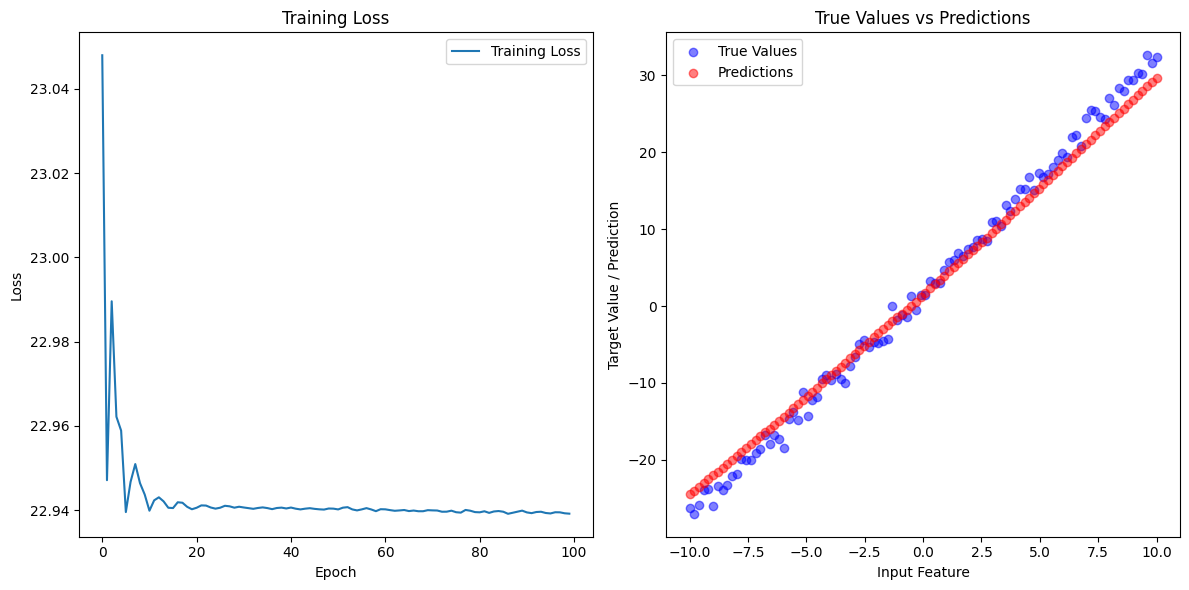

In [36]:
# Plot the training loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Predict and plot the results
y_pred = model.predict(X)

plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True Values', color='blue', alpha=0.5)
plt.scatter(X, y_pred, label='Predictions', color='red', alpha=0.5)
plt.xlabel('Input Feature')
plt.ylabel('Target Value / Prediction')
plt.title('True Values vs Predictions')
plt.legend()

plt.tight_layout()
plt.show()


This metric is used to evaluate model performance during training and validation.

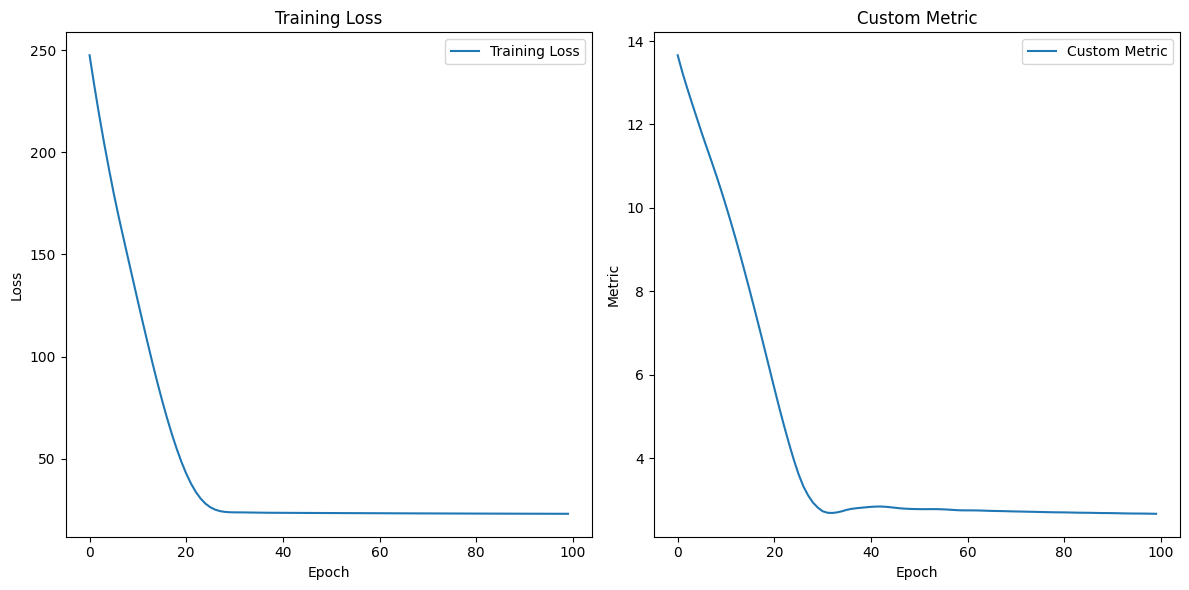

In [44]:
# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Define custom loss function
def custom_mse_loss(y_true, y_pred):
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    penalty_loss = tf.reduce_mean(tf.square(y_pred) * 0.1)
    return mse_loss + penalty_loss

# Define custom metric
class CustomMAEMetric(tf.keras.metrics.Metric):
    def __init__(self, penalty=1.0, name='custom_mae', **kwargs):
        super(CustomMAEMetric, self).__init__(name=name, **kwargs)
        self.penalty = penalty
        self.total_mae = self.add_weight(name='total_mae', initializer='zeros')
        self.total_count = self.add_weight(name='total_count', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        mae = tf.reduce_mean(tf.abs(y_true - y_pred))
        penalty = tf.reduce_mean(tf.abs(y_pred) * self.penalty)
        self.total_mae.assign_add(mae + penalty) # Adds the sum of MAE and penalty to total_mae.
        self.total_count.assign_add(1)

    def result(self):
        return self.total_mae / self.total_count

    def reset_states(self): # This method resets the state variables at the start of each epoch or when explicitly called.
        self.total_mae.assign(0)
        self.total_count.assign(0)

# Generate synthetic data
np.random.seed(0)
tf.random.set_seed(0)

X = np.linspace(-10, 10, 100).reshape(-1, 1).astype(np.float32)
y = (3 * X + 2 + np.random.normal(0, 1, X.shape)).astype(np.float32)

# Compile the model
model.compile(optimizer='adam', loss=custom_mse_loss, metrics=[CustomMAEMetric(penalty=0.1)])

# Train the model
history = model.fit(X, y, epochs=100, verbose=0, validation_split=0.1)

# Plot the training loss and custom metric
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot custom metric
plt.subplot(1, 2, 2)
plt.plot(history.history['custom_mae'], label='Custom Metric')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Custom Metric')
plt.legend()

plt.tight_layout()
plt.show()
